In [469]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
import math
import random
import warnings
warnings.filterwarnings("ignore")

In [398]:
# 1
random.seed(1)
data = pd.read_csv("data2.txt", header=None)

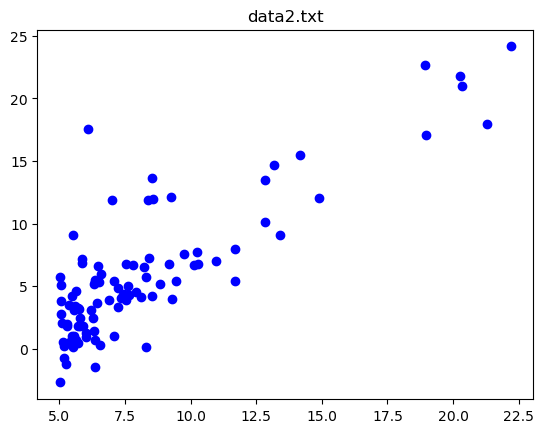

In [399]:
x = np.array(data[0])
y = np.array(data[1])
plt.plot(x,y, "bo")
plt.title("data2.txt")
plt.show()


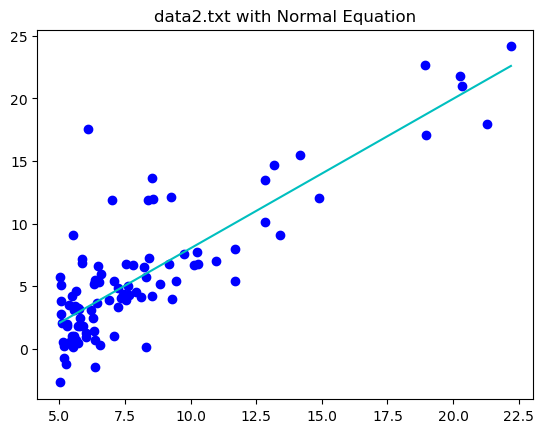

Coefficients: 
y = 1.1930336441895963*x + -3.8957808783118857


In [400]:
xn = np.reshape(x, (97,1))
xn = np.concatenate([np.ones((len(xn), 1)), xn], axis=1) # need to add bias term for normal equation
yn = np.reshape(y, (97,1))
w = np.linalg.inv(xn.T.dot(xn)).dot(xn.T).dot(yn)
plt.plot(x,y, "bo")
plt.title("data2.txt with Normal Equation")
x1 = np.linspace(min(x), max(x), 1000)
y1 = x1*w[1][0] + w[0][0]
plt.plot(x1,y1, "c")
plt.show()
print("Coefficients: ")
print(f"y = {w[1][0]}*x + {w[0][0]}")

In [401]:
x_train, x_test, y_train, y_test = train_test_split(xn,yn,random_state=1, test_size=0.2)
def gradient_descent(x,y,a,max_iter,threshold, mode):
    m, n = x.shape
    w = np.array([(random.random()) for esh in range(n)])
    w = w.reshape(n,1)
    iters = []
    mse_values = []
    for esh in range(max_iter):
        iters.append(esh)
        y_pred = np.dot(x, w) 
        y_pred = y_pred.reshape(len(y_pred),1)
        #mse = np.square(np.subtract(y,y_pred)).mean()
        mse = mean_squared_error(y,y_pred) 
        mse_values.append(mse)
        if mode == "stochastic":
            index = random.randint(0,m - 1)
            xi = x[index].reshape(-1,1)
            yi = y[index]
            y_predi = y_pred[index][0]
            gradient = -2/1 * xi * (yi-y_predi)
        elif mode == "batch":
            gradient = -2/m * x.T.dot(y-y_pred)
        else:
            print("mode error, choose either stochastic or batch")
            raise NameError
        w = w - a*gradient
        if np.linalg.norm(gradient) <= threshold:
            print(f"Iteration: {esh}")
            return w,mse,iters, mse_values
        
    return w, mse, iters, mse_values
batch_train=gradient_descent(x_train,y_train,0.001,1000,.00001, "batch")

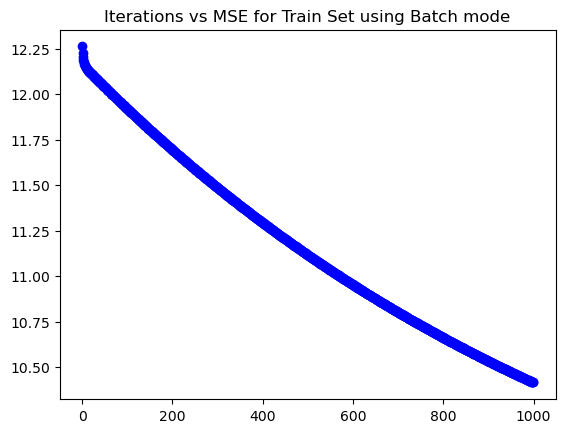

In [402]:
plt.plot(batch_train[2],batch_train[3], "bo")
plt.title("Iterations vs MSE for Train Set using Batch mode")
plt.show()

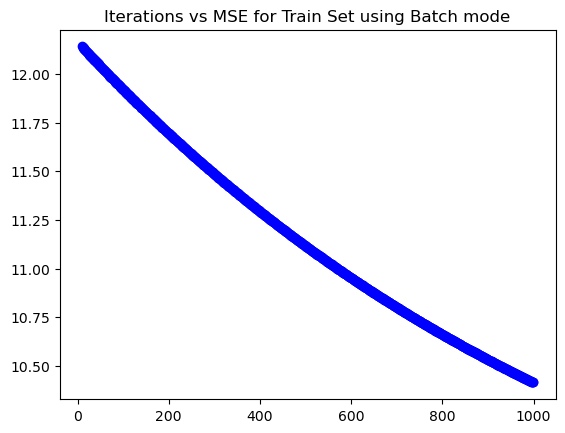

In [403]:
plt.plot(batch_train[2][10:],batch_train[3][10:], "bo")
plt.title("Iterations vs MSE for Train Set using Batch mode")
plt.show()

In [404]:
stochastic_train=gradient_descent(x_train,y_train,0.0001,1000,.00001, "stochastic")

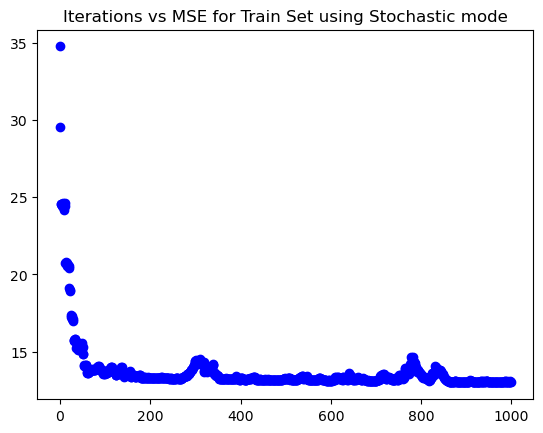

In [405]:
plt.plot(stochastic_train[2],stochastic_train[3], "bo")
plt.title("Iterations vs MSE for Train Set using Stochastic mode")
plt.show()

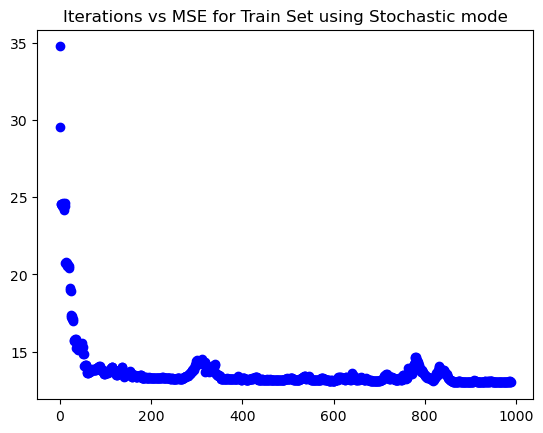

In [406]:
plt.plot(stochastic_train[2][:-10],stochastic_train[3][:-10], "bo")
plt.title("Iterations vs MSE for Train Set using Stochastic mode")
plt.show()

In [407]:
batch_test=gradient_descent(x_test,y_test,0.001,1000,.00001, "batch")

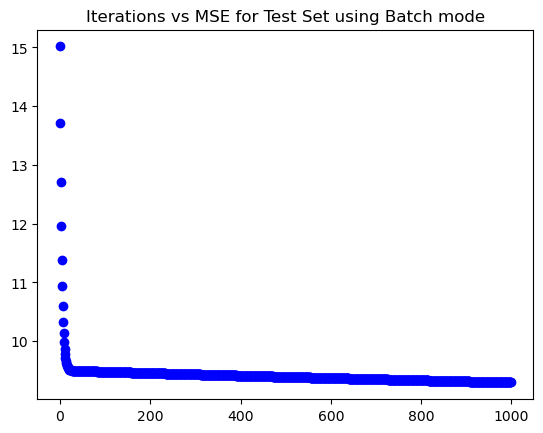

In [408]:
plt.plot(batch_test[2],batch_test[3], "bo")
plt.title("Iterations vs MSE for Test Set using Batch mode")
plt.show()

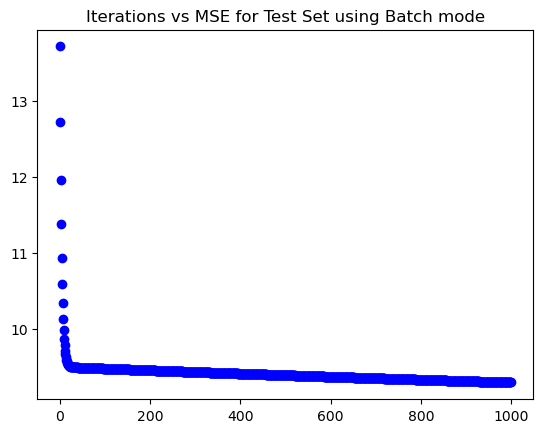

In [409]:
plt.plot(batch_test[2][1:],batch_test[3][1:], "bo")
plt.title("Iterations vs MSE for Test Set using Batch mode")
plt.show()

In [410]:
stochastic_test=gradient_descent(x_test,y_test,0.0001,1000,.00001, "stochastic")

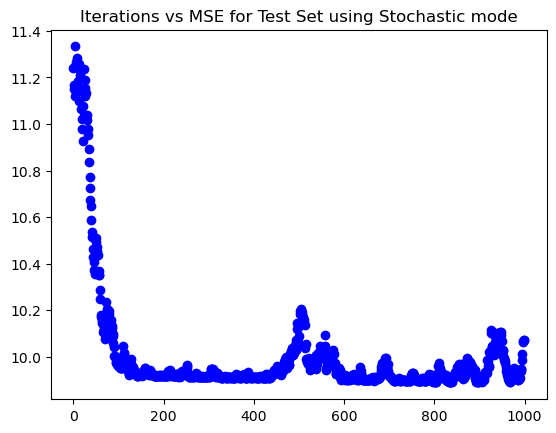

In [411]:
plt.plot(stochastic_test[2],stochastic_test[3], "bo")
plt.title("Iterations vs MSE for Test Set using Stochastic mode")
plt.show()

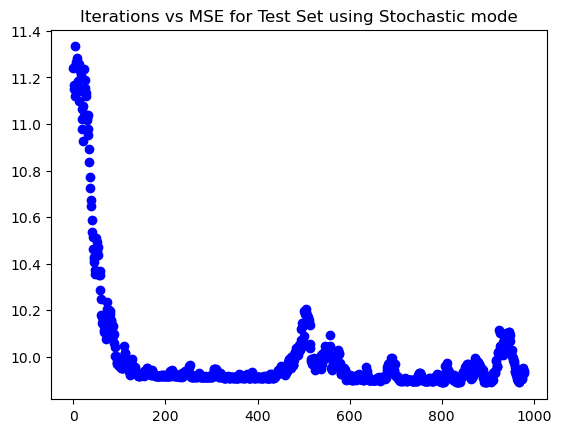

In [412]:
plt.plot(stochastic_test[2][:-20],stochastic_test[3][:-20], "bo")
plt.title("Iterations vs MSE for Test Set using Stochastic mode")
plt.show()

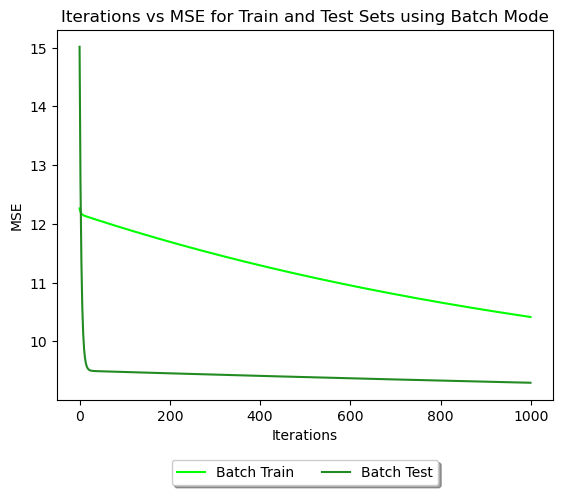

In [413]:
plt.plot(batch_train[2],batch_train[3], "lime", label = "Batch Train")
plt.plot(batch_test[2],batch_test[3], "forestgreen", label = "Batch Test")
plt.legend(loc="lower center", bbox_to_anchor= (0.5,-0.25), fancybox=True, shadow=True, ncol=2)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Iterations vs MSE for Train and Test Sets using Batch Mode")
plt.show()

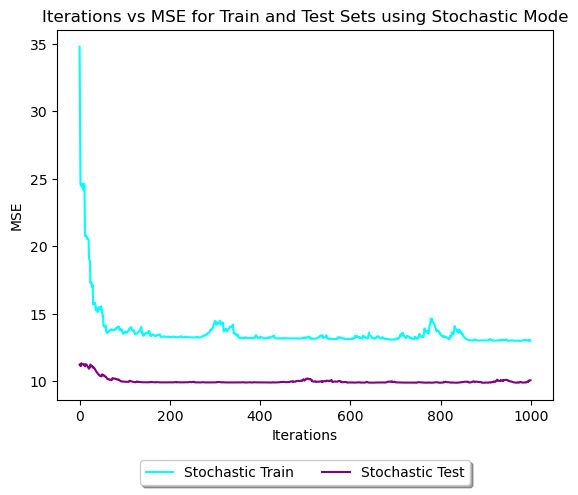

In [414]:
plt.plot(stochastic_train[2],stochastic_train[3], "cyan", label = "Stochastic Train")
plt.plot(stochastic_test[2],stochastic_test[3], "purple", label = "Stochastic Test")
plt.legend(loc="lower center", bbox_to_anchor= (0.5,-0.25), fancybox=True, shadow=True, ncol=2)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Iterations vs MSE for Train and Test Sets using Stochastic Mode")
plt.show()

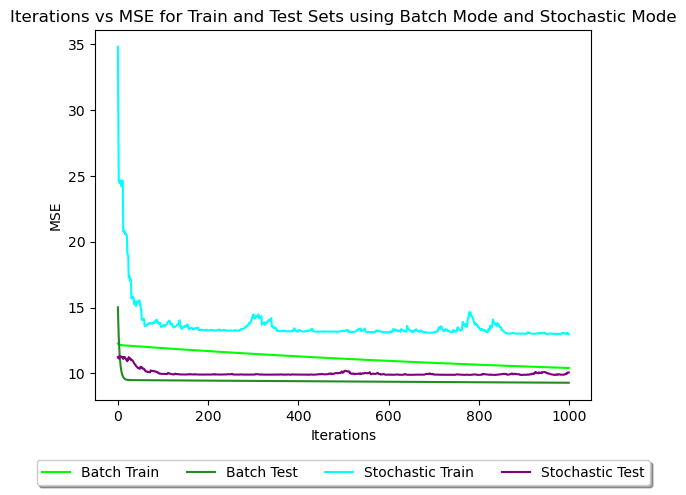

In [415]:
plt.plot(batch_train[2],batch_train[3], "lime", label = "Batch Train")
plt.plot(batch_test[2],batch_test[3], "forestgreen", label = "Batch Test")
plt.plot(stochastic_train[2],stochastic_train[3], "cyan", label = "Stochastic Train")
plt.plot(stochastic_test[2],stochastic_test[3], "purple", label = "Stochastic Test")
plt.legend(loc="lower center", bbox_to_anchor= (0.5,-0.25), fancybox=True, shadow=True, ncol=4)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Iterations vs MSE for Train and Test Sets using Batch Mode and Stochastic Mode")
plt.show()

The above graphs showcase the MSE values for training and sets sets using batch and stochastic modes for each iteration of the 
gradient descent function. Each graph also has another graph with less datapoints to highlight possible trends with some outliers removed. The learning rate is set to a small value because stochastic mode had issues with excess noise for higher learning rates. For accuracy of test sets batch mode is more accurate. This is because for each iteration the entire dataset is used therefore more information is processed when compared to stocashtic mode since that only takes a single sample per iteration. The same is true for the train sets with batch having a lower mse than stochastic which again makes sense as explained previously. Moreover for both train and test sets the batch mode has a smoother line. This is because stochastic has more noise since the points are chosen at random, therefore some iterations may actually be worse even though the overall trend may be down. Batch will consistitley result in lower values until it converges at a point. Early stopping may be more beneficial for stocastic mode since it can stop while the mse or other error metric is more consitently low than risk having iterations that result in higher errors. Based on the scale in the graph. It appears that Batch Train consistetly decreasses in mse while Batch test converges after a few iterations around 10-20. Stoachastic train seems to converge around 200 interations with further iterations resulting in signidicant noise before converging again followed by more noise between 700-850 iterations with another convergence after that. Stochastic Test converges around the same < 200 iterations with other noise bumps around 500 and 900 iterations. Based on that, models trained with stochastic gradient descent should have iterations as a tunable parameter to better avoid possible noise scenarios. When doing this its randomization seed should be constant to make tuning more consitent.

[9.42141142411879, 9.35593135539209, 9.182631417831512, 9.044260868481354, 8.918949543973495, 8.813037539010603, 8.800037485076492, 8.783948611580747, 8.759366373466232, 8.717103759130431]


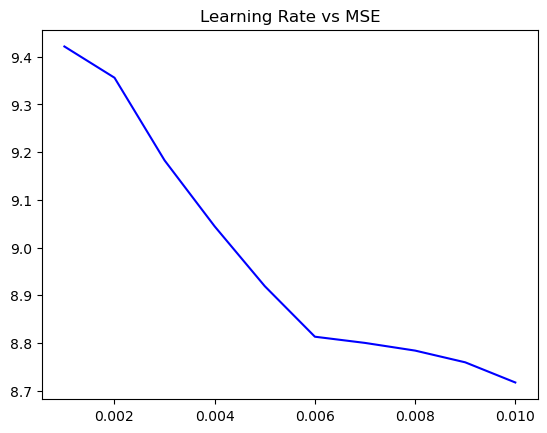

In [416]:
mse_values = []
learning_rates = [.001, 0.002, 0.003, 0.004, 0.005,0.006, 0.007, 0.008, 0.009, 0.01]
for esh in learning_rates:
    mse_values.append(gradient_descent(x_test,y_test, esh, 1000, .00001, "batch")[1])
print(mse_values)
plt.plot(learning_rates, mse_values, "b")
plt.title("Learning Rate vs MSE")
plt.show()

Based on the above graph it appears that for the values given, learning rate is inversely proportional to MSE.
The overall trend seems to follow -x. This is contrary to my previous prijections. I expected MSE to decrease as learning
rate decreased because if learning rate is too high, you can overshoot the local minimum. However it appears that at this 
range that is not yet the case. In fact, based on the graph, it appears that the learning rates are too small and therefore 
converge too early before the local minimum. It may be that if the iterations are increased the smaller learning rates will perform better than higher learning rates with lower iterations. Therefore it is important to test different ranges of learning rates for machine learning because you cannot be too sure what the optimal learning rate is wether higher or lower than expected.

[9.913866974760388, 9.198519686880264, 9.843923005120562, 23.221466204733243, 8.858849484542143, 50.946980661260056, 15.960494008428398, 9.220838522297822, 107.31733529496458, 22.242238694533466]


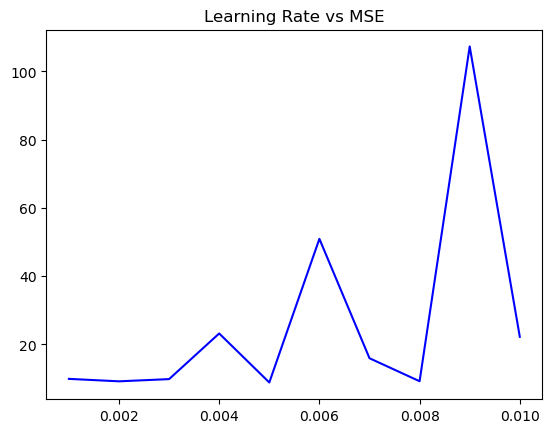

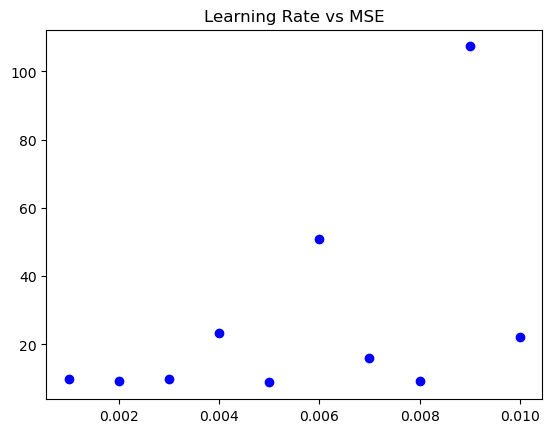

In [440]:
mse_values = []
learning_rates = [.001, 0.002, 0.003, 0.004, 0.005,0.006, 0.007, 0.008, 0.009, 0.01]
for esh in learning_rates:
    mse_values.append(gradient_descent(x_test,y_test, esh, 1000, .00001, "stochastic")[1])
print(mse_values)
plt.plot(learning_rates, mse_values, "blue")
plt.title("Learning Rate vs MSE")
plt.show()
plt.plot(learning_rates, mse_values, "bo")
plt.title("Learning Rate vs MSE")
plt.show()

At constant iterations there does not seem to be a definative pattern for learning rates with stochastic gradient descent. Each time the cell above is run, the results are different and sporatic. This may be due to the specific seed chosen. There is noise when stochastic gradient descent is used to to the randomness. However it does seem that the lower learning rates are more consitstantley lower than the higher values. This could be because when the learning rate is too high the model has a hard time converging since the model overshoots the target to often so when the iterations stop it is during a period of overshoot so it has higher error. That could be why the results could be more sporatic. For this dataset is appears that a much lower learning rate is better or perhaps a higher learning rate with more iterations.

In [456]:
# 2
df = pd.read_csv("breast+cancer+wisconsin+diagnostic/wdbc.data", header=None)
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [458]:
df[1]=[0 if i == "M" else 1 for i in df[1]]
y = df[1]
x = df.drop([0,1], axis=1)
print(x.head())
print(y.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

      2      3       4       5        6        7       8        9       10  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        11  ...     22     23      24      25      26      27      28      29  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1 

In [465]:
lr = LogisticRegression(max_iter = 1000, random_state=1, n_jobs = -1)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9473684210526315


In [471]:
lrc = LogisticRegressionCV(max_iter = 1000, random_state=1, n_jobs = -1)
lrc.fit(x_train, y_train)
y_pred = lrc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.956140350877193


In [472]:
lrc = LogisticRegressionCV(max_iter = 1000, random_state=1, n_jobs = -1)
parameter_grid = {
    "penalty" : ["l1", "l2", "elasticnet"],
    "Cs" : [0,1,2,3,4,5,6,7,8,9,10] 
}
gs = GridSearchCV(estimator=lrc, param_grid=parameter_grid, cv=5, n_jobs=-1, verbose=4)
gs.fit(x_train, y_train)
print("Best parameters found: ", gs.best_params_)
y_pred = gs.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Fitting 5 folds for each of 33 candidates, totalling 165 fits
Best parameters found:  {'Cs': 5, 'penalty': 'l2'}
Accuracy: 0.9649122807017544


Both LogisticRegression and LogisticRegressionCV have access to the full 30 features included in the dataset for training. For LogisticRegression model the parameters used are max_iter = 1000, random_state = 1 for run to run consistency and n_jobs = -1 to possibly speed up training time by using all avaliable CPU threads. The remaining values are default. That means that the penalty is set to L2 which is ridge regression. The result is an accuracy score of 0.9473684210526315. The LogisticRegressionCV model is slightly different it has the same parameters with the exeption of Cs which is an int or list of floats that describe the regularization strength. It is an array for LogisticRegressionCV while LogisticRegression is just an int. If an int is input  for Cs an array is calculated from it. In order to optimize lambda for the second model a grid search was used testing ints from 0 to 10 and the different penalties. Before that the default parameters were used which resulted in accuracy of 0.956140350877193 which is higher than the base LogisticRegression Model. After a grid search the parameters selected was l2 penalty and Cs = 5 which resulted in an accuracy of 0.9649122807017544. The difference may be explained by cross-validation. Cross validation is used in LogisticRegressionCV. Cross validation tests the parameters against different datasets by subsetting the given dataset and testing the parameters across each subset to retain independence from other tests. In this way Cs are further tuned by the model. Therefor while Cs = 5 was the best parameter, the model used that value to generate an array of possible C values from the input 5 and tuned that parameter using StratifiedKFold cross validation as per the documentation. This extra tuning of the regularization hyperparameter is what leads to increased score.